# CSST 106
**Verdad, Jane Benneth Dione**

**BSCS-4B**

**September 09, 2024**

**Machine Problem 2**


#**Topic 1.2: Image Processing Techniques**

# **Hands-On Exploration**

**Lab Session 1: Image Transformation**

**Scaling and Rotation**

**1.1** Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**1.2** Define Functions

In [ ]:
#Load image
image = cv2.imread('verdad.jpg')

# Convert BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Scaling
scaled_image = cv2.resize(image, None, fx=0.5, fy=0.5)

# Rotation
h, w = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((w // 2, h // 2), 45, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Convert scaled and rotated images for display
scaled_image_rgb = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB)
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

**1.3** Display Output

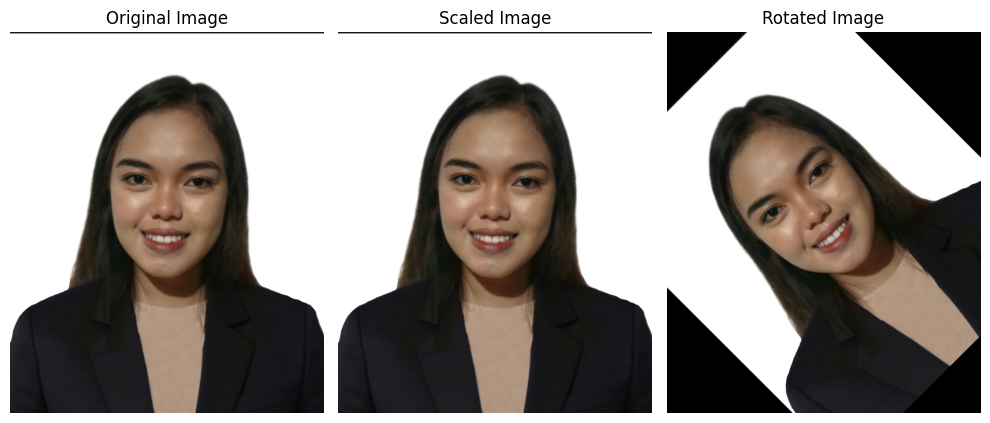

In [ ]:
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the scaled image
plt.subplot(1, 3, 2)
plt.imshow(scaled_image_rgb)
plt.title('Scaled Image')
plt.axis('off')

# Display the rotated image
plt.subplot(1, 3, 3)
plt.imshow(rotated_image_rgb)
plt.title('Rotated Image')
plt.axis('off')

# Show all images in a single figure
plt.tight_layout()
plt.show()

**Lab Session 2: Filtering Techniques**

**Blurring and Edge Detection**

**2.1** Define Functions

In [ ]:
# Convert image from BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Blurring Techniques
gaussian_blur = cv2.GaussianBlur(image, (25, 25), 0)
median_blur = cv2.medianBlur(image, 15)
bilateral_blur = cv2.bilateralFilter(image, 50, 75, 50)

# Convert blurred images to RGB for display
gaussian_blur_rgb = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)
median_blur_rgb = cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)
bilateral_blur_rgb = cv2.cvtColor(bilateral_blur, cv2.COLOR_BGR2RGB)

# Edge Detection using Canny
canny = cv2.Canny(image, 50, 50)
# Edge Detection using Sobel
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.convertScaleAbs(cv2.magnitude(sobelx, sobely))
# Edge Detection using Prewitt
def prewitt_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
    prewitt_combined = cv2.magnitude(cv2.filter2D(gray, cv2.CV_64F, kernelx), cv2.filter2D(gray, cv2.CV_64F, kernely))
    return cv2.convertScaleAbs(prewitt_combined)
prewitt = prewitt_edge_detection(image)

**2.2** Display Output

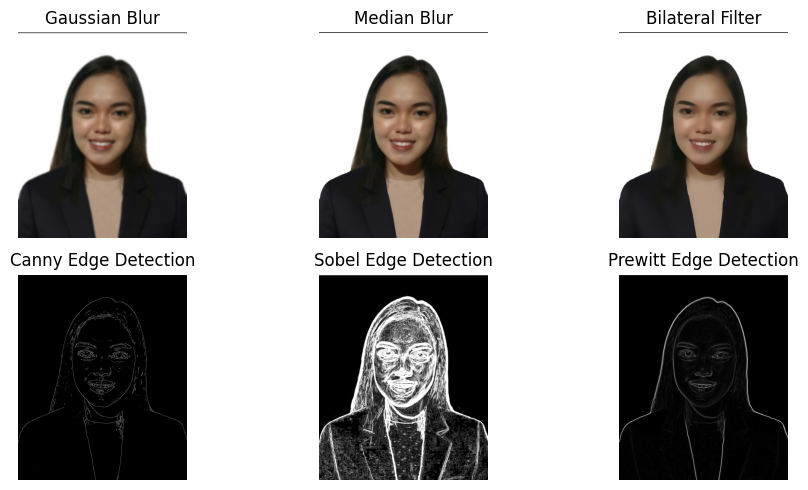

In [ ]:
plt.figure(figsize=(10, 5))

# Gaussian Blur
plt.subplot(2, 3, 1)
plt.imshow(gaussian_blur_rgb)
plt.title('Gaussian Blur')
plt.axis('off')

# Median Blur
plt.subplot(2, 3, 2)
plt.imshow(median_blur_rgb)
plt.title('Median Blur')
plt.axis('off')

# Bilateral Filter
plt.subplot(2, 3, 3)
plt.imshow(bilateral_blur_rgb)
plt.title('Bilateral Filter')
plt.axis('off')

# Edge Detection using Canny
plt.subplot(2, 3, 4)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Edge Detection using Sobel
plt.subplot(2, 3, 5)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

# Edge Detection using Prewitt
plt.subplot(2, 3, 6)
plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Problem Solving Session**

**Common Image Processing Tasks: Scenario-Based Problems**

**Scenario**: Detecting Objects in a Blurry Image

**Problem**: An image where objects are barely visible due to motion blur. The task is to reduce the blurring and highlight the edges of the objects for easier detection.

**Solution Approach:** First, apply a sharpening kernel to reduce the blur and enhance the image. Then, use Canny edge detection to outline the objects.

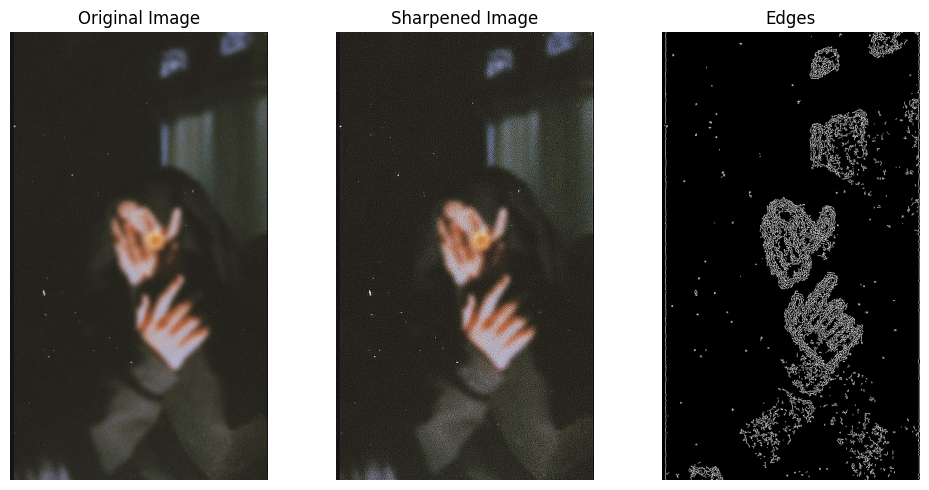

In [ ]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('blurry.jpg')

# Convert image from BGR (OpenCV default) to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Sharpen the image using a kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_img = cv2.filter2D(img_rgb, -1, kernel)

# Apply Canny edge detection
edges = cv2.Canny(img, 50, 100)

# Display the ouput of the processed images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Sharpened image
plt.subplot(1, 3, 2)
plt.imshow(sharpened_img)
plt.title('Sharpened Image')
plt.axis('off')

# Edge detection
plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

# **Assignment**

**Implementing Image Transformations and Filtering**

**A.** Install and Import Libraries

In [2]:
!pip install pillow matplotlib

from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

**B.** Scaling and Rotation

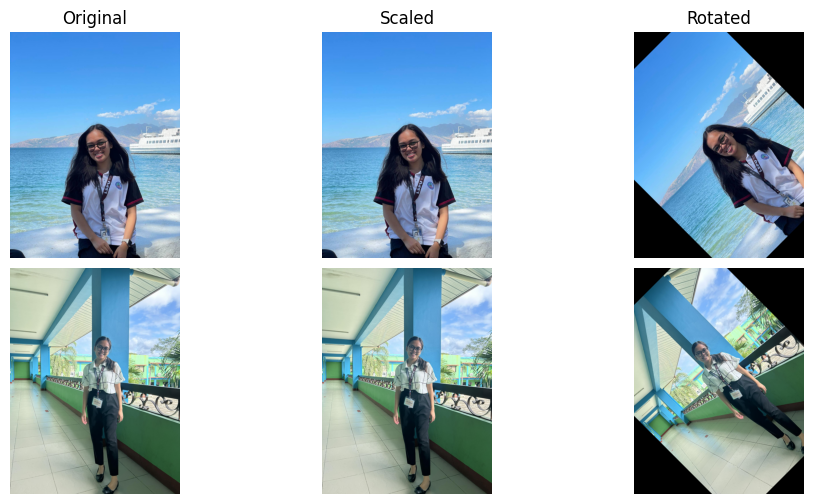

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and transform images
def transform_images(image_paths):
    original_images = []
    scaled_images = []
    rotated_images = []

    for path in image_paths:
        img = Image.open(path)
        original_images.append(img)
        scaled_images.append(img.resize((int(img.width * 0.5), int(img.height * 0.5))))  # Scale to 50%
        rotated_images.append(img.rotate(45))  # Rotate by 45 degrees

    return original_images, scaled_images, rotated_images

# Paths to your images
image_paths = ['/content/jane.jpg', '/content/jbdv.jpg']

# Transform the images
original_images, scaled_images, rotated_images = transform_images(image_paths)

# Display images in columns for Original, Scaled, and Rotated
def display_images(original, scaled, rotated):
    plt.figure(figsize=(12, 6))

    for i in range(len(original)):
        # Original
        plt.subplot(len(original), 3, i * 3 + 1)
        plt.imshow(original[i])
        plt.axis('off')
        if i == 0:
            plt.title('Original')

        # Scaled
        plt.subplot(len(original), 3, i * 3 + 2)
        plt.imshow(scaled[i])
        plt.axis('off')
        if i == 0:
            plt.title('Scaled')

        # Rotated
        plt.subplot(len(original), 3, i * 3 + 3)
        plt.imshow(rotated[i])
        plt.axis('off')
        if i == 0:
            plt.title('Rotated')

    # Adjust the spacing between images
    plt.subplots_adjust(wspace=0.02, hspace=0.04)
    plt.show()

# Call the display function
display_images(original_images, scaled_images, rotated_images)


**C**. Blurring

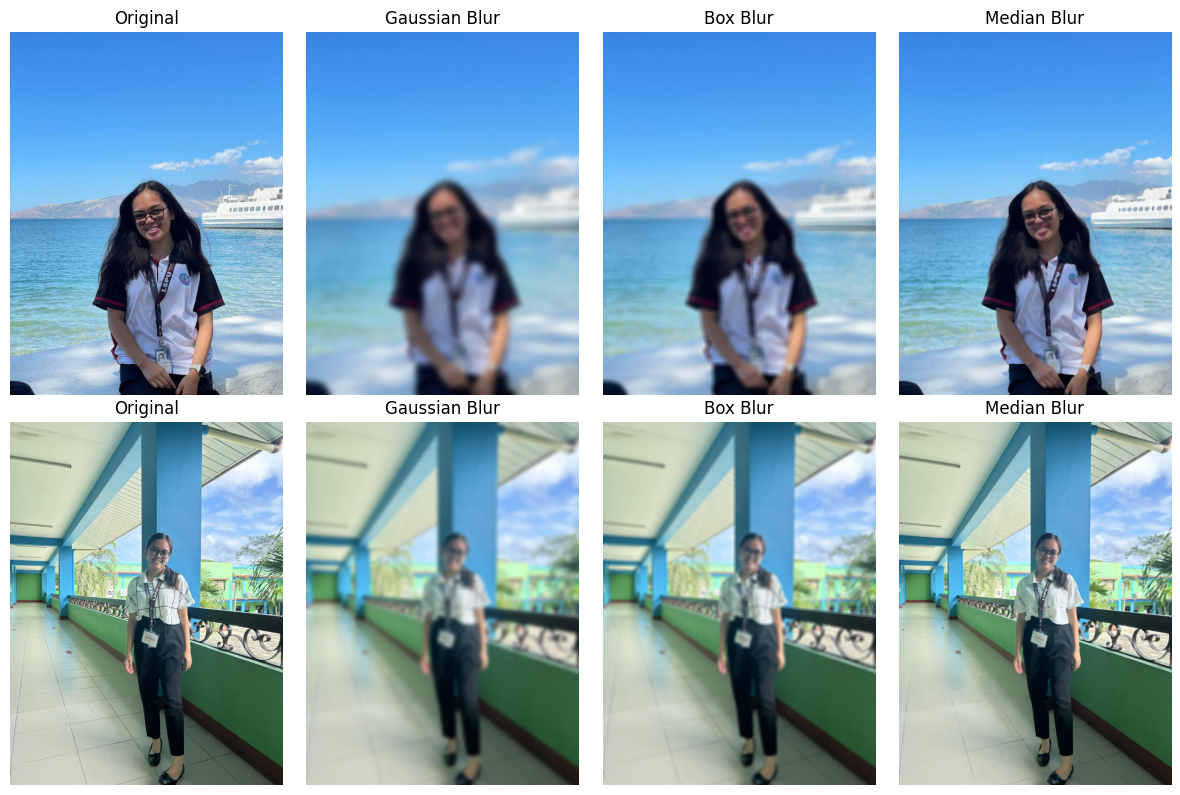

In [17]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Load and apply blurring techniques
def apply_blur(image_paths):
    original_images = []
    blurred_images = []

    for path in image_paths:
        img = Image.open(path)
        original_images.append(img)

        # Apply different blurring techniques with higher values
        blurred_images.append({
            'Gaussian Blur': img.filter(ImageFilter.GaussianBlur(radius=10)),
            'Box Blur': img.filter(ImageFilter.BoxBlur(radius=10)),
            'Median Blur': img.filter(ImageFilter.MedianFilter(size=9)),
        })

    return original_images, blurred_images

# Paths to your images
image_paths = ['/content/jane.jpg', '/content/jbdv.jpg']

# Apply blurring techniques
original_images, blurred_images = apply_blur(image_paths)

# Display images
def display_images(original, blurred):
    num_images = len(original)
    blur_types = len(blurred[0])  # Number of blur techniques

    plt.figure(figsize=(12, 8))

    for i in range(num_images):
        # Display Original image
        plt.subplot(num_images, blur_types + 1, i * (blur_types + 1) + 1)
        plt.imshow(original[i])
        plt.axis('off')
        plt.title('Original')

        # Display Blurred images for each blur type
        for j, (blur_type, img) in enumerate(blurred[i].items()):
            plt.subplot(num_images, blur_types + 1, i * (blur_types + 1) + j + 2)
            plt.imshow(img)
            plt.axis('off')
            plt.title(blur_type)

    plt.tight_layout()
    plt.show()

# Call the display function
display_images(original_images, blurred_images)

**D.** Edge Detection

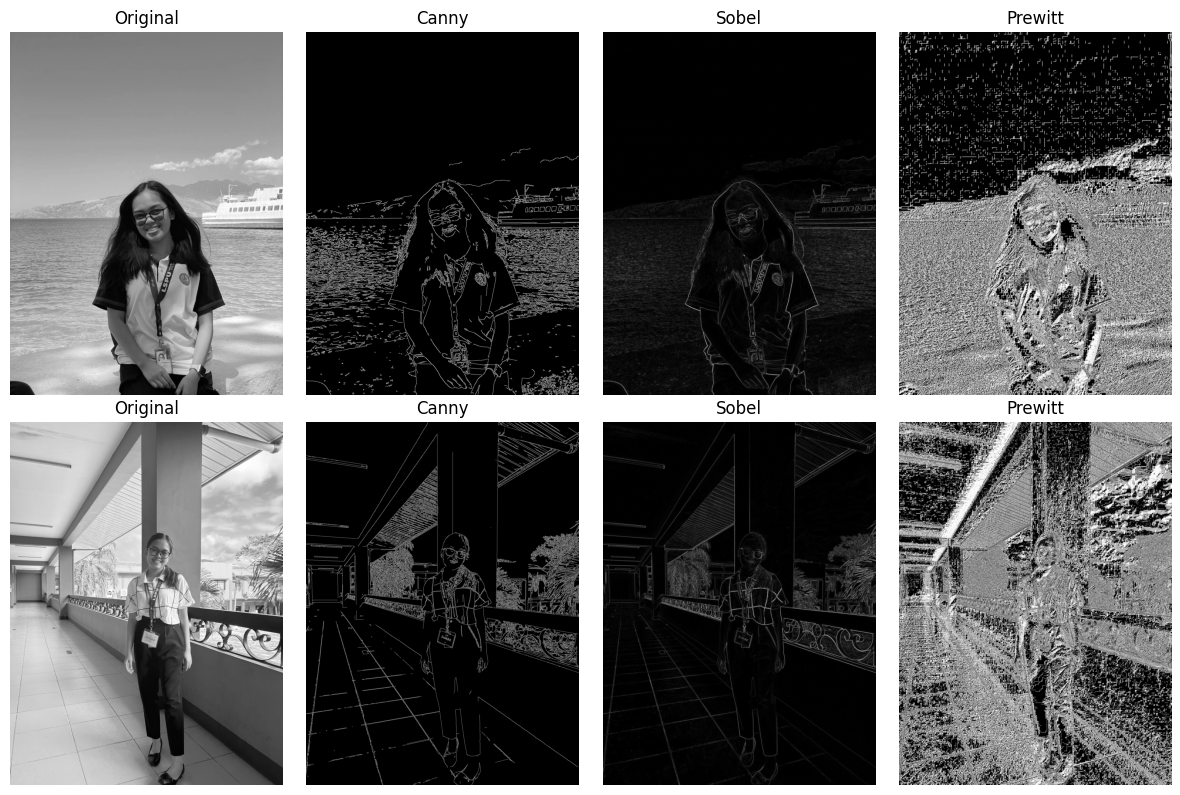

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import prewitt

# Load and apply edge detection techniques
def apply_edge_detection(image_paths):
    original_images = []
    edge_detected_images = []

    for path in image_paths:
        # Load image in grayscale for edge detection
        img = Image.open(path).convert('L')
        img_np = np.array(img)
        original_images.append(img)

        # Apply Canny Edge Detection
        edges_canny = cv2.Canny(img_np, 100, 200)

        # Apply Sobel Edge Detection
        sobelx = cv2.Sobel(img_np, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(img_np, cv2.CV_64F, 0, 1, ksize=3)
        edges_sobel = cv2.magnitude(sobelx, sobely)

        # Apply Prewitt Edge Detection (using SciPy)
        edges_prewitt_x = prewitt(img_np, axis=0)
        edges_prewitt_y = prewitt(img_np, axis=1)
        edges_prewitt = np.hypot(edges_prewitt_x, edges_prewitt_y)

        # Store all edge-detected images
        edge_detected_images.append({
            'Canny': edges_canny,
            'Sobel': edges_sobel,
            'Prewitt': edges_prewitt
        })

    return original_images, edge_detected_images

# Paths to your images
image_paths = ['/content/jane.jpg', '/content/jbdv.jpg']

# Apply edge detection techniques
original_images, edge_detected_images = apply_edge_detection(image_paths)

# Display images
def display_images(original, edges):
    num_images = len(original)
    edge_types = len(edges[0])
    plt.figure(figsize=(12, 8))

    for i in range(num_images):
        # Display Original image
        plt.subplot(num_images, edge_types + 1, i * (edge_types + 1) + 1)
        plt.imshow(original[i], cmap='gray')
        plt.axis('off')
        plt.title('Original')

        # Display Edge-detected images for each technique
        for j, (edge_type, img) in enumerate(edges[i].items()):
            plt.subplot(num_images, edge_types + 1, i * (edge_types + 1) + j + 2)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.title(edge_type)

    plt.tight_layout()
    plt.show()

# Call the display function
display_images(original_images, edge_detected_images)